# Public Schools in Ontario
This notebook contains code for downloading/scraping the data, data cleaning, preparation and loading to databases for visualization using Tableau. 
The data is further cleaned and processed and used for training and evaluating machine learning model.


## Ontario Schools Data
* Data Source : https://www.ontario.ca/data/school-information-and-student-demographics

In [1]:
#Import dependancies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Visit URL & download data, save as Excel file

import requests

url="https://files.ontario.ca/opendata/sif_data_table_2017_2018prelim_en_june.xlsx"

myfile = requests.get(url)

output = open('../Data/Schools_EQAO/sif_data_table_2017_2018prelim_en_june.xlsx', 'wb')

output.write(myfile.content)

output.close()

print("Done!")

Done!


In [3]:
# Read excel file downloaded above

path="../Data/Schools_EQAO/sif_data_table_2017_2018prelim_en_june.xlsx"
schools_eqao=pd.read_excel(path)
schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 6 Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics,Change in Grade 9 Academic Mathematics Achievement Over Three Years,Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics,Change in Grade 9 Applied Mathematics Achievement Over Three Years,Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy Achievement Over Three Years,Percentage of Children Who Live in Low-Income Households,Percentage of Students Whose Parents Have Some University Education,Extract Date
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,N/D,NaN,N/R,NaN,N/R,NaN,22.7,20.5,2019-06-17
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,-36.0,NaN,NaN,NaN,NaN,NaN,NaN,11,56.3,2019-06-17
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-06-17
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,32,31.4,2019-06-17
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-06-17


In [4]:
#Describe data

schools_eqao.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrolment,4819.0,418.172235,304.687226,10.00000,216.000000,346.00000,534.00000,2080.00000
Latitude,4887.0,44.232766,1.436709,41.80695,43.481690,43.77387,44.50844,51.46627
Longitude,4887.0,-79.711127,2.593013,-94.56370,-80.308555,-79.56298,-79.21214,-74.47102
Change in Grade 3 Reading Achievement Over Three Years,3084.0,2.948119,13.878343,-56.00000,-5.000000,3.00000,11.00000,65.00000
Change in Grade 3 Writing Achievement Over Three Years,3086.0,-2.086520,16.039496,-74.00000,-11.000000,-3.00000,7.00000,92.00000
Change in Grade 3 Mathematics Achievement Over Three Years,3134.0,-1.945437,16.200346,-77.00000,-12.000000,-2.00000,7.75000,85.00000
Change in Grade 6 Reading Achievement Over Three Years,2917.0,1.146726,11.355510,-42.00000,-5.000000,1.00000,7.00000,57.00000
Change in Grade 6 Writing Achievement Over Three Years,2917.0,-0.562564,13.019662,-68.00000,-8.000000,0.00000,7.00000,64.00000
Change in Grade 6 Mathematics Achievement Over Three Years,2915.0,-1.553002,16.380268,-69.00000,-11.000000,-1.00000,8.00000,65.00000
Change in Grade 9 Academic Mathematics Achievement Over Three Years,699.0,0.964235,10.739298,-50.00000,-4.000000,1.00000,6.00000,64.00000


In [5]:
# Change dtype of all columns containing 'percentage' to float, remove % sign and convert to .2f
# Replace 'nan',''NA','SP' and 'N/D' by 'NaN'. 

for column in schools_eqao.columns:
    if 'Percentage' in column:
        schools_eqao[column].replace(to_replace=['SP','N/D','N/R','NA'],value=np.nan,inplace=True)
        schools_eqao[column]= schools_eqao[column].str.replace(r'%',r'').astype('float')
        

In [6]:
# Check data types

schools_eqao.dtypes

Board Number                                                                                        object
Board Name                                                                                          object
Board Type                                                                                          object
School Number                                                                                       object
School Name                                                                                         object
School Type                                                                                         object
School Special Condition Code                                                                       object
School Level                                                                                        object
School Language                                                                                     object
Grade Range                          

In [7]:
# Drop columns with blank lat and long

# Get names of indexes for which column Latitude is null
indexNames = schools_eqao[ schools_eqao['Latitude'].isnull()].index
 
# Delete these row indexes from dataFrame
schools_eqao.drop(indexNames , inplace=True)

schools_eqao.reset_index(drop=True)

schools_eqao.count()

Board Number                                                                                4887
Board Name                                                                                  4887
Board Type                                                                                  4887
School Number                                                                               4887
School Name                                                                                 4887
School Type                                                                                 4887
School Special Condition Code                                                               4887
School Level                                                                                4887
School Language                                                                             4887
Grade Range                                                                                 4887
Building Suite                

In [8]:
#Insert new column with avg. EQAO scores 

schools_eqao['Avg_EQAO']=\
schools_eqao[['Percentage of Grade 3 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 3 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Reading',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Writing',\
              'Percentage of Grade 6 Students Achieving the Provincial Standard in Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Academic Mathematics',\
              'Percentage of Grade 9 Students Achieving the Provincial Standard in Applied Mathematics',\
              'Percentage of Students That Passed the Grade 10 OSSLT on Their First Attempt'
             ]].mean(axis=1)


In [9]:
#Insert new column with avg. change in EQAO scores 

schools_eqao['Avg_change_EQAO']=\
schools_eqao[['Change in Grade 3 Reading Achievement Over Three Years',\
              'Change in Grade 3 Writing Achievement Over Three Years',\
              'Change in Grade 3 Mathematics Achievement Over Three Years',\
              'Change in Grade 6 Reading Achievement Over Three Years',\
              'Change in Grade 6 Writing Achievement Over Three Years',\
              'Change in Grade 6 Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Academic Mathematics Achievement Over Three Years',\
              'Change in Grade 9 Applied Mathematics Achievement Over Three Years',\
              'Change in Grade 10 OSSLT Literacy Achievement Over Three Years'
             ]].mean(axis=1)

In [10]:
#drop values with NaN Avg EQAO
schools_eqao.dropna(subset=['Avg_EQAO'])

#Delete Columns only when all values are Null
schools_eqao = schools_eqao.dropna(axis=1,how='all')

#Rename Columns

schools_eqao.columns = schools_eqao.columns.str.replace('Percentage of','Perc')
schools_eqao.columns = schools_eqao.columns.str.replace('Students','stud')

char=[' Whose',' Who',' Is',' Achievement Over Three Years',' to',' Achieving the Provincial Standard in',\
     ' Have',' Some',' Speaking Country',' from']

for char in char:
    schools_eqao.columns = schools_eqao.columns.str.replace(char,'')

In [11]:
# Review new column names

schools_eqao.columns

Index(['Board Number', 'Board Name', 'Board Type', 'School Number',
       'School Name', 'School Type', 'School Special Condition Code',
       'School Level', 'School Language', 'Grade Range', 'Building Suite',
       'P.O. Box', 'Street', 'Municipality', 'City', 'Province', 'Postal Code',
       'Phone Number', 'Fax Number', 'School Website', 'Board Website',
       'Enrolment', 'Latitude', 'Longitude',
       'Perc stud First Language Not English',
       'Perc stud First Language Not French',
       'Perc stud Are New Canada a Non-English',
       'Perc stud Are New Canada a Non-French',
       'Perc stud Receiving Special Education Services',
       'Perc stud Identified as Gifted', 'Perc Grade 3 stud Reading',
       'Change in Grade 3 Reading', 'Perc Grade 3 stud Writing',
       'Change in Grade 3 Writing', 'Perc Grade 3 stud Mathematics',
       'Change in Grade 3 Mathematics', 'Perc Grade 6 stud Reading',
       'Change in Grade 6 Reading', 'Perc Grade 6 stud Writing',
     

In [12]:
# Review data frame

schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Change in Grade 9 Academic Mathematics,Perc Grade 9 stud Applied Mathematics,Change in Grade 9 Applied Mathematics,Perc stud That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy,Perc Children Live in Low-Income Households,Perc stud Parents University Education,Extract Date,Avg_EQAO,Avg_change_EQAO
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,NaN,NaN,NaN,NaN,NaN,22.7,20.5,2019-06-17,NaN,NaN
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,11.0,56.3,2019-06-17,59.666667,-23.166667
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,...,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-06-17,68.666667,22.000000
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,32.0,31.4,2019-06-17,41.333333,-24.333333
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-06-17,45.500000,-14.833333


###  Put cleaned dataframe in MySql db for future use

Tableau is directly connected to this database for data visualization purposes

In [13]:
from sqlalchemy import *
from sqlalchemy.schema import CreateSchema
import pymysql
from config import username,pwd,host
import pymongo

#database connection
metadata = MetaData()
engine = create_engine(f'mysql+pymysql://{username}:{pwd}@{host}:3306')
engine.execute(CreateSchema('Schools'))

In [14]:
engine.execute("USE Schools")
schools_eqao.to_sql(name='schools_data', con=engine, if_exists = 'replace', index=False)

## Ontario education news

Scrape the latest news on education from Government of Ontario's website. https://news.ontario.ca/
This will be cleaned processed using nltk libraries and visualized using Tableau.

In [15]:
# Scrape news from the web
from bs4 import BeautifulSoup

news_list=[]
time_list=[]
link_list=[]

#Scraping 120 pages of news
for i in range(1,121):
    url = 'https://news.ontario.ca/en/search?entry_blog_ids%5B%5D=22&page='+str(i)

# Retrieve page with the requests module
    response = requests.get(url)

# Create BeautifulSoup object; parse with 'lxml'
    soup = BeautifulSoup(response.text, 'lxml')

    news = soup.find_all('h2',class_="accessibility-sub-header")
    time = soup.find_all('time')
    

    for news in news:
        news_list.append(news.text)
        link_list.append(news.a['href'])
    
    for time in time:
        time_list.append(time.text)



In [16]:
df=pd.DataFrame(list(zip(news_list,time_list,link_list)),columns=['headline','time','link'])
df.head()

,headline,time,link
0,Minister of Education to Make an Announcement,"October 24, 2019 6:00 P.M.",https://news.ontario.ca/edu/en/2019/10/ministe...
1,Minister Lecce Statement on Reducing Class Size,"October 24, 2019 5:43 P.M.",https://news.ontario.ca/edu/en/2019/10/ministe...
2,Education Minister to Hold a Media Availability,"October 24, 2019 12:30 P.M.",https://news.ontario.ca/edu/en/2019/10/educati...
3,Electronic Press Kit Now Available: Ontario Mo...,"October 11, 2019 12:45 P.M.",https://news.ontario.ca/edu/en/2019/10/electro...
4,Ontario More Than Doubles Mental Health Fundin...,"October 10, 2019 11:11 A.M.",https://news.ontario.ca/edu/en/2019/10/ontario...


In [17]:
# Converting date from string to date-time

import re
from datetime import datetime

time = df['time']
year=[]
month=[]
day=[]

for string in time:
   year.append(string[string.find(', ')+len(', '):string.rfind('')][0:4])
   month.append(string.split(' ')[0])
   day.append(string.split(', 2')[0].split(' ')[-1])

for i in range (0,len(time)):
    s=year[i]+' '+month[i]+' '+day[i]
    time[i]=datetime.strptime(s, '%Y %B %d')

In [18]:
df.head()

,headline,time,link
0,Minister of Education to Make an Announcement,2019-10-24 00:00:00,https://news.ontario.ca/edu/en/2019/10/ministe...
1,Minister Lecce Statement on Reducing Class Size,2019-10-24 00:00:00,https://news.ontario.ca/edu/en/2019/10/ministe...
2,Education Minister to Hold a Media Availability,2019-10-24 00:00:00,https://news.ontario.ca/edu/en/2019/10/educati...
3,Electronic Press Kit Now Available: Ontario Mo...,2019-10-11 00:00:00,https://news.ontario.ca/edu/en/2019/10/electro...
4,Ontario More Than Doubles Mental Health Fundin...,2019-10-10 00:00:00,https://news.ontario.ca/edu/en/2019/10/ontario...


In [19]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

#Concatenate all headlines for analysis
headlines = df.headline.str.cat(sep=' ')


#function to split text into word
tokens = word_tokenize(headlines)

stop_words = set(stopwords.words('english'))
stop_words.update(["Ontario",":","-",",","archive","ontario","minister","'s"])


tokens = [w.lower() for w in tokens]
tokens = [lemmatizer.lemmatize(w) for w in tokens]
tokens = [w for w in tokens if not w in stop_words]



frequency_dist = nltk.FreqDist(tokens)

top_N = 100

rslt = pd.DataFrame(frequency_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
rslt.head(20)

,Word,Frequency
0,education,444
1,school,374
2,medium,309
3,advisory,292
4,student,291
5,make,174
6,announcement,164
7,board,120
8,new,110
9,government,107


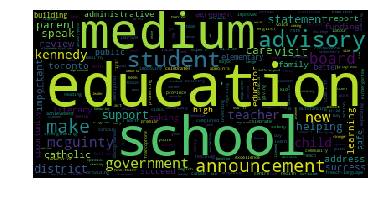

In [20]:
# Create wordcloud. Also visualized in Tableau

from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Save scraping Data to MongoDb
Tableau is connected to this database for visualization purposes. This data is not further used for machine learning.

In [21]:
import pymongo

conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [22]:
#create db
db = client.schoolDB

#create tables
headlines = db.headlines.find()
wordfreq = db.wordfreq.find()

#populate tables
db.headlines.insert_many(df.to_dict('records'))
db.wordfreq.insert_many(rslt.to_dict('records'))

# Machine Learning

Machine learning model to predict performance of a school based on characteristics of a school and characteristics of the population in vicinity of the school.

## Mapping population of nearest geographical areas to school data using latitude and longitude

In [130]:
#Read Dissemination Area (DA) file containing census DA centre lat and long

path="../Data/DA centre lat long/DA_centre_lat_long_Ontario_cleaned.xlsx"

da_df=pd.read_excel(path)
da_df.head()

,DA_id,DA_lat,DA_long
0,35510089,45.734932,-82.328953
1,35520104,46.258873,-81.796169
2,35520114,46.237923,-81.800407
3,35510072,45.974472,-81.965987
4,35510070,45.927388,-81.894390


In [131]:
# Map nearest 4 DAs to the school
#use scipy.spatial.KDTree.query to find nearest neighbor

from scipy import spatial
tree = spatial.KDTree(list(zip(da_df['DA_lat'], da_df['DA_long'])))

# print(tree.data)

school_loc = list(zip(schools_eqao['Latitude'],schools_eqao['Longitude']))

n=len(school_loc)

Nearest4DA=[]

for i in range (0,n) :
    Nearest4DA.append(list(da_df.loc[tree.query(school_loc[i],k=4, eps=0, p=2)[1]]['DA_id']))
    
schools_eqao['Nearest4DA']=Nearest4DA

schools_eqao.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,Building Suite,P.O. Box,Street,Municipality,City,Province,Postal Code,Phone Number,Fax Number,School Website,Board Website,Enrolment,Latitude,Longitude,Perc stud First Language Not English,Perc stud First Language Not French,Perc stud Are New Canada a Non-English,Perc stud Are New Canada a Non-French,Perc stud Receiving Special Education Services,Perc stud Identified as Gifted,Perc Grade 3 stud Reading,Change in Grade 3 Reading,Perc Grade 3 stud Writing,Change in Grade 3 Writing,Perc Grade 3 stud Mathematics,Change in Grade 3 Mathematics,Perc Grade 6 stud Reading,Change in Grade 6 Reading,Perc Grade 6 stud Writing,Change in Grade 6 Writing,Perc Grade 6 stud Mathematics,Change in Grade 6 Mathematics,Perc Grade 9 stud Academic Mathematics,Change in Grade 9 Academic Mathematics,Perc Grade 9 stud Applied Mathematics,Change in Grade 9 Applied Mathematics,Perc stud That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy,Perc Children Live in Low-Income Households,Perc stud Parents University Education,Extract Date,Avg_EQAO,Avg_change_EQAO,Nearest4DA
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,NaN,NaN,550 Northern Ave,Sault Ste. Marie,Sault Ste Marie,Ontario,P6B4J4,705-945-7194,705-945-7173,http://www.adsb.on.ca,http://www.adsb.on.ca,202.0,46.53477,-84.30772,NaN,100.0,NaN,NaN,19.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.7,20.5,2019-06-17,NaN,NaN,"[35570382, 35570097, 35570099, 35570096]"
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),019186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,250 Mark St,Sault Ste. Marie,Sault Ste Marie,Ontario,P6A3M7,705-945-7106,705-945-7221,http://www.adsb.on.ca/sites/schools/amc/defaul...,http://www.adsb.on.ca,182.0,46.50593,-84.28732,NaN,100.0,NaN,NaN,14.8,NaN,79.0,-7.0,50.0,-29.0,64.0,-7.0,86.0,-14.0,43.0,-46.0,36.0,-36.0,NaN,NaN,NaN,NaN,NaN,NaN,11.0,56.3,2019-06-17,59.666667,-23.166667,"[35570112, 35570111, 35570065, 35570068]"
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),067679,Arthur Henderson Public School,Public,Not applicable,Elementary,English,JK-3,NaN,NaN,2 Henderson Lane 2,Bruce Mines,Bruce Mines,Ontario,P0R1C0,705-785-3483,705-785-3220,http://www.adsb.on.ca/sites/schools/art/defaul...,http://www.adsb.on.ca,64.0,46.30183,-83.78020,NaN,100.0,NaN,NaN,NaN,NaN,80.0,40.0,73.0,20.0,53.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.3,37.2,2019-06-17,68.666667,22.000000,"[35570324, 35570323, 35570319, 35570317]"
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),043362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,24 Paradise Ave,Sault Ste. Marie,Sault Ste Marie,Ontario,P6B5K2,705-945-7108,705-945-7205,http://www.adsb.on.ca/sites/schools/brm/defaul...,http://www.adsb.on.ca,177.0,46.52455,-84.29804,NaN,100.0,NaN,NaN,17.5,NaN,62.0,-17.0,31.0,-48.0,38.0,-41.0,50.0,-7.0,42.0,-29.0,25.0,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,31.4,2019-06-17,41.333333,-24.333333,"[35570094, 35570093, 35570095, 35570061]"
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),054542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,NaN,NaN,19 Hanes Ave,Blind River,Blind River,Ontario,P0R1B0,705-356-7752,705-356-0271,http://www.adsb.on.ca/sites/schools/bli/defaul...,http://www.adsb.on.ca,152.0,46.18454,-82.95760,NaN,99.3,NaN,NaN,25.6,NaN,59.0,3.0,41.0,-28.0,45.0,-17.0,78.0,7.0,28.0,-43.0,22.0,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,24.8,19.8,2019-06-17,45.500000,-14.833333,"[35570340, 35570341, 35570332, 35570339]"


In [132]:
# Read census file

path="../Data/Census/Census_2016_ON_v2.xlsx"

census_df=pd.read_excel(path)
census_df.head()

,GEO UID,Population_2016,Avg_age,Age_0to14yrs,Age_15to64yrs,Age_65+yrs,Avg_household_size,Dwelling_Total,Dwelling_Single-detached house,Dwelling_Apartment,Dwelling_Otherattached,MaritalStatus_Married,MaritalStatus_NotMarried,KnowledgeofOfficialLanguage_EnglishOnly,KnowledgeofOfficialLanguage_FrenchOnly,KnowledgeofOfficialLanguage_both,KnowledgeofOfficialLanguage_none,MedianIncome,Canadian citizens,NotCanadianCitizens,Immigration_Non-immigrants,Immigration_Immigrants,Immigration_Immigrants _Before1981,Immigration _Immigrants_1981to1990,Immigration_Immigrants_1991to2000,Immigration_Immigrants_2001to2010,Immigration_ Immigrants_2011to2016,Immigration_Non-permanent residents,Immigration_SelectedPlacesBirth_Americas,Immigration_SelectedPlacesBirth_Europe,Immigration_SelectedPlacesBirth_Africa,Immigration_SelectedPlacesBirth_Asia,Immigration_SelectedPlacesBirth_Oceania_Other,Housing_Owner,Housing_Renter,Housing_BandHousing,EthnicOrigin_Total,EthnicOrigin_NorthAmericanAboriginal,EthnicOrigin_OtherNorthAmerican,EthnicOrigin_European,EthnicOrigin_Caribbean,EthnicOrigin_LatinCentralSouthAmerican,EthniOrigin_African,EthnicOrigin_Asian,EthnicOrigin_Oceania,Education_No certificateDiplomaDegree,Education_Secondary(high)SchoolDiploma,Education_PostsecondaryCertificateDiplomaDegree,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove,Labour_InLabourForce,Labour_InLabourForce_Employed,Labour_InLabourForce_Unemployed,Labour_NotInLabourForce
0,3501,113429.0,44.1,15.7,62.6,21.8,2.3,47830.0,33550.0,1195.0,12640.0,57700.0,37970.0,67450.0,1370.0,42760.0,205.0,59526.0,109050.0,1760.0,103310.0,7170.0,3850.0,865.0,975.0,1080.0,400.0,330.0,1150.0,4045.0,235.0,1695.0,45.0,33880.0,13945.0,0.0,110815.0,8035.0,55935.0,74500.0,515.0,325.0,680.0,3420.0,115.0,20885.0,29220.0,42965.0,8285.0,22700.0,1720.0,10265.0,55175.0,50890.0,4290.0,37895.0
1,35010155,457.0,45.9,11.0,67.0,23.1,2.5,185.0,185.0,0.0,0.0,260.0,145.0,175.0,15.0,265.0,5.0,63360.0,465.0,10.0,455.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,160.0,25.0,0.0,470.0,15.0,230.0,335.0,0.0,10.0,0.0,0.0,0.0,65.0,120.0,210.0,35.0,115.0,15.0,50.0,270.0,250.0,20.0,130.0
2,35010156,448.0,46.5,12.4,67.4,20.2,2.2,205.0,190.0,0.0,5.0,240.0,150.0,140.0,30.0,275.0,0.0,52352.0,455.0,15.0,420.0,55.0,35.0,10.0,10.0,0.0,0.0,10.0,10.0,45.0,0.0,0.0,0.0,190.0,30.0,0.0,470.0,15.0,230.0,315.0,0.0,0.0,0.0,0.0,0.0,100.0,115.0,240.0,80.0,90.0,10.0,55.0,270.0,265.0,0.0,180.0
3,35010157,469.0,43.6,18.1,62.8,19.1,2.5,190.0,185.0,0.0,5.0,250.0,140.0,180.0,20.0,270.0,0.0,62976.0,430.0,20.0,405.0,30.0,10.0,0.0,20.0,0.0,0.0,15.0,0.0,30.0,0.0,0.0,0.0,170.0,15.0,0.0,450.0,0.0,180.0,360.0,0.0,0.0,0.0,10.0,0.0,105.0,120.0,160.0,10.0,70.0,15.0,65.0,280.0,260.0,15.0,105.0
4,35010158,492.0,44.7,15.2,66.7,18.2,2.4,200.0,195.0,0.0,5.0,250.0,170.0,115.0,75.0,305.0,0.0,67072.0,510.0,10.0,465.0,50.0,35.0,0.0,10.0,10.0,0.0,0.0,10.0,30.0,0.0,0.0,0.0,190.0,20.0,0.0,520.0,45.0,340.0,225.0,0.0,0.0,15.0,20.0,0.0,100.0,75.0,240.0,65.0,95.0,15.0,60.0,260.0,230.0,30.0,155.0


In [133]:
# Save list of column names

columns=census_df.columns

columns

Index(['GEO UID', 'Population_2016', 'Avg_age', 'Age_0to14yrs',
       'Age_15to64yrs', 'Age_65+yrs', 'Avg_household_size', 'Dwelling_Total',
       'Dwelling_Single-detached house', 'Dwelling_Apartment',
       'Dwelling_Otherattached', 'MaritalStatus_Married',
       'MaritalStatus_NotMarried', 'KnowledgeofOfficialLanguage_EnglishOnly',
       'KnowledgeofOfficialLanguage_FrenchOnly',
       'KnowledgeofOfficialLanguage_both', 'KnowledgeofOfficialLanguage_none',
       'MedianIncome', 'Canadian citizens', 'NotCanadianCitizens',
       'Immigration_Non-immigrants', 'Immigration_Immigrants',
       'Immigration_Immigrants _Before1981',
       'Immigration _Immigrants_1981to1990',
       'Immigration_Immigrants_1991to2000',
       'Immigration_Immigrants_2001to2010',
       'Immigration_ Immigrants_2011to2016',
       'Immigration_Non-permanent residents',
       'Immigration_SelectedPlacesBirth_Americas',
       'Immigration_SelectedPlacesBirth_Europe',
       'Immigration_SelectedPlac

In [134]:
# Replacing all blanks with np.nan
pd.set_option('display.max_columns', 500)
census_df.replace(r'^\s*$', np.nan, regex=True)

,GEO UID,Population_2016,Avg_age,Age_0to14yrs,Age_15to64yrs,Age_65+yrs,Avg_household_size,Dwelling_Total,Dwelling_Single-detached house,Dwelling_Apartment,Dwelling_Otherattached,MaritalStatus_Married,MaritalStatus_NotMarried,KnowledgeofOfficialLanguage_EnglishOnly,KnowledgeofOfficialLanguage_FrenchOnly,KnowledgeofOfficialLanguage_both,KnowledgeofOfficialLanguage_none,MedianIncome,Canadian citizens,NotCanadianCitizens,Immigration_Non-immigrants,Immigration_Immigrants,Immigration_Immigrants _Before1981,Immigration _Immigrants_1981to1990,Immigration_Immigrants_1991to2000,Immigration_Immigrants_2001to2010,Immigration_ Immigrants_2011to2016,Immigration_Non-permanent residents,Immigration_SelectedPlacesBirth_Americas,Immigration_SelectedPlacesBirth_Europe,Immigration_SelectedPlacesBirth_Africa,Immigration_SelectedPlacesBirth_Asia,Immigration_SelectedPlacesBirth_Oceania_Other,Housing_Owner,Housing_Renter,Housing_BandHousing,EthnicOrigin_Total,EthnicOrigin_NorthAmericanAboriginal,EthnicOrigin_OtherNorthAmerican,EthnicOrigin_European,EthnicOrigin_Caribbean,EthnicOrigin_LatinCentralSouthAmerican,EthniOrigin_African,EthnicOrigin_Asian,EthnicOrigin_Oceania,Education_No certificateDiplomaDegree,Education_Secondary(high)SchoolDiploma,Education_PostsecondaryCertificateDiplomaDegree,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove,Labour_InLabourForce,Labour_InLabourForce_Employed,Labour_InLabourForce_Unemployed,Labour_NotInLabourForce
0,3501,113429.0,44.1,15.7,62.6,21.8,2.3,47830.0,33550.0,1195.0,12640.0,57700.0,37970.0,67450.0,1370.0,42760.0,205.0,59526.0,109050.0,1760.0,103310.0,7170.0,3850.0,865.0,975.0,1080.0,400.0,330.0,1150.0,4045.0,235.0,1695.0,45.0,33880.0,13945.0,0.0,110815.0,8035.0,55935.0,74500.0,515.0,325.0,680.0,3420.0,115.0,20885.0,29220.0,42965.0,8285.0,22700.0,1720.0,10265.0,55175.0,50890.0,4290.0,37895.0
1,35010155,457.0,45.9,11.0,67.0,23.1,2.5,185.0,185.0,0.0,0.0,260.0,145.0,175.0,15.0,265.0,5.0,63360.0,465.0,10.0,455.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,160.0,25.0,0.0,470.0,15.0,230.0,335.0,0.0,10.0,0.0,0.0,0.0,65.0,120.0,210.0,35.0,115.0,15.0,50.0,270.0,250.0,20.0,130.0
2,35010156,448.0,46.5,12.4,67.4,20.2,2.2,205.0,190.0,0.0,5.0,240.0,150.0,140.0,30.0,275.0,0.0,52352.0,455.0,15.0,420.0,55.0,35.0,10.0,10.0,0.0,0.0,10.0,10.0,45.0,0.0,0.0,0.0,190.0,30.0,0.0,470.0,15.0,230.0,315.0,0.0,0.0,0.0,0.0,0.0,100.0,115.0,240.0,80.0,90.0,10.0,55.0,270.0,265.0,0.0,180.0
3,35010157,469.0,43.6,18.1,62.8,19.1,2.5,190.0,185.0,0.0,5.0,250.0,140.0,180.0,20.0,270.0,0.0,62976.0,430.0,20.0,405.0,30.0,10.0,0.0,20.0,0.0,0.0,15.0,0.0,30.0,0.0,0.0,0.0,170.0,15.0,0.0,450.0,0.0,180.0,360.0,0.0,0.0,0.0,10.0,0.0,105.0,120.0,160.0,10.0,70.0,15.0,65.0,280.0,260.0,15.0,105.0
4,35010158,492.0,44.7,15.2,66.7,18.2,2.4,200.0,195.0,0.0,5.0,250.0,170.0,115.0,75.0,305.0,0.0,67072.0,510.0,10.0,465.0,50.0,35.0,0.0,10.0,10.0,0.0,0.0,10.0,30.0,0.0,0.0,0.0,190.0,20.0,0.0,520.0,45.0,340.0,225.0,0.0,0.0,15.0,20.0,0.0,100.0,75.0,240.0,65.0,95.0,15.0,60.0,260.0,230.0,30.0,155.0
5,35010159,517.0,45.9,13.6,64.1,22.3,2.5,210.0,205.0,0.0,5.0,310.0,135.0,155.0,50.0,305.0,0.0,72448.0,465.0,10.0,450.0,25.0,15.0,0.0,10.0,0.0,0.0,0.0,10.0,15.0,0.0,0.0,0.0,180.0,15.0,0.0,475.0,15.0,255.0,290.0,25.0,0.0,0.0,20.0,0.0,90.0,130.0,200.0,45.0,85.0,0.0,60.0,275.0,245.0,35.0,145.0
6,35010160,509.0,43.5,13.9,68.3,17.8,2.6,200.0,180.0,0.0,10.0,290.0,145.0,145.0,20.0,345.0,0.0,73216.0,505.0,25.0,490.0,15.0,15.0,0.0,0.0,0.0,0.0,25.0,0.0,10.0,0.0,0.0,0.0,160.0,35.0,0.0,530.0,45.0,255.0,425.0,0.0,0.0,0.0,25.0,0.0,125.0,125.0,215.0,65.0,85.0,10.0,70.0,310.0,290.0,20.0,155.0
7,35010161,388.0,43.7,15.4,62.8,21.8,2.6,150.0,130.0,0.0,10.0,220.0,110.0,120.0,

In [135]:
#Saving as another df for mapping

schools_eqao_mapping=schools_eqao[['School Number','Nearest4DA']]

# Splitting list of DAs in different columns

schools_eqao_mapping=pd.concat([schools_eqao_mapping['School Number'],schools_eqao_mapping['Nearest4DA'].apply(pd.Series)],axis=1)
schools_eqao_mapping=schools_eqao_mapping.rename(columns={0: "DA1", 1: "DA2",2: "DA3",3: "DA4"})
schools_eqao_mapping.head()

,School Number,DA1,DA2,DA3,DA4
0,902344,35570382,35570097,35570099,35570096
1,019186,35570112,35570111,35570065,35570068
2,067679,35570324,35570323,35570319,35570317
3,043362,35570094,35570093,35570095,35570061
4,054542,35570340,35570341,35570332,35570339


In [136]:
#Mapping census data for DA1

df_mapped=schools_eqao_mapping.merge(census_df,how='left',left_on='DA1', right_on='GEO UID',suffixes=('_Census','_DA1'))
df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID,Population_2016,Avg_age,Age_0to14yrs,Age_15to64yrs,Age_65+yrs,Avg_household_size,Dwelling_Total,Dwelling_Single-detached house,Dwelling_Apartment,Dwelling_Otherattached,MaritalStatus_Married,MaritalStatus_NotMarried,KnowledgeofOfficialLanguage_EnglishOnly,KnowledgeofOfficialLanguage_FrenchOnly,KnowledgeofOfficialLanguage_both,KnowledgeofOfficialLanguage_none,MedianIncome,Canadian citizens,NotCanadianCitizens,Immigration_Non-immigrants,Immigration_Immigrants,Immigration_Immigrants _Before1981,Immigration _Immigrants_1981to1990,Immigration_Immigrants_1991to2000,Immigration_Immigrants_2001to2010,Immigration_ Immigrants_2011to2016,Immigration_Non-permanent residents,Immigration_SelectedPlacesBirth_Americas,Immigration_SelectedPlacesBirth_Europe,Immigration_SelectedPlacesBirth_Africa,Immigration_SelectedPlacesBirth_Asia,Immigration_SelectedPlacesBirth_Oceania_Other,Housing_Owner,Housing_Renter,Housing_BandHousing,EthnicOrigin_Total,EthnicOrigin_NorthAmericanAboriginal,EthnicOrigin_OtherNorthAmerican,EthnicOrigin_European,EthnicOrigin_Caribbean,EthnicOrigin_LatinCentralSouthAmerican,EthniOrigin_African,EthnicOrigin_Asian,EthnicOrigin_Oceania,Education_No certificateDiplomaDegree,Education_Secondary(high)SchoolDiploma,Education_PostsecondaryCertificateDiplomaDegree,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove,Labour_InLabourForce,Labour_InLabourForce_Employed,Labour_InLabourForce_Unemployed,Labour_NotInLabourForce
0,902344,35570382,35570097,35570099,35570096,35570382,489.0,44.6,13.4,67.0,20.6,1.8,275.0,60.0,100.0,120.0,175.0,245.0,425.0,0.0,60.0,0.0,29120.0,415.0,10.0,375.0,40.0,35.0,0.0,0.0,0.0,0.0,10.0,10.0,35.0,0.0,10.0,0.0,50.0,215.0,0.0,425.0,65.0,110.0,330.0,10.0,0.0,0.0,15.0,0.0,70.0,140.0,165.0,30.0,75.0,0.0,60.0,180.0,140.0,40.0,195.0
1,019186,35570112,35570111,35570065,35570068,35570112,517.0,43.5,13.6,64.1,21.4,2.4,220.0,210.0,0.0,5.0,270.0,175.0,465.0,0.0,55.0,0.0,82688.0,425.0,25.0,385.0,50.0,40.0,0.0,0.0,10.0,0.0,20.0,15.0,30.0,0.0,0.0,0.0,195.0,15.0,0.0,450.0,50.0,145.0,365.0,0.0,0.0,10.0,40.0,0.0,55.0,120.0,210.0,10.0,75.0,0.0,130.0,215.0,190.0,25.0,175.0
2,067679,35570324,35570323,35570319,35570317,35570324,582.0,50.7,12.9,55.2,32.8,2.1,270.0,245.0,0.0,25.0,330.0,175.0,545.0,0.0,35.0,0.0,51200.0,565.0,10.0,515.0,60.0,45.0,15.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,0.0,250.0,35.0,0.0,570.0,25.0,190.0,460.0,0.0,0.0,0.0,10.0,0.0,155.0,115.0,240.0,50.0,100.0,10.0,85.0,205.0,200.0,0.0,305.0
3,043362,35570094,35570093,35570095,35570061,35570094,521.0,43.0,18.3,61.5,21.2,2.5,205.0,175.0,0.0,30.0,300.0,125.0,460.0,0.0,60.0,0.0,98048.0,500.0,15.0,470.0,50.0,35.0,0.0,0.0,0.0,20.0,0.0,0.0,25.0,10.0,20.0,0.0,205.0,10.0,0.0,520.0,35.0,65.0,460.0,0.0,0.0,0.0,40.0,0.0,45.0,120.0,235.0,35.0,75.0,15.0,125.0,255.0,240.0,15.0,150.0
4,054542,35570340,35570341,35570332,35570339,35570340,465.0,45.1,15.1,63.4,22.6,2.1,230.0,140.0,0.0,85.0,210.0,190.0,335.0,0.0,125.0,5.0,44416.0,505.0,10.0,485.0,30.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,10.0,0.0,130.0,120.0,0.0,510.0,100.0,215.0,375.0,0.0,0.0,0.0,10.0,0.0,90.0,140.0,215.0,55.0,95.0,25.0,40.0,240.0,210.0,30.0,210.0


In [137]:
#Mapping census data for DA2

df_mapped=df_mapped.merge(census_df,how='left',left_on='DA2', right_on='GEO UID',suffixes=('_DA1','_DA2'))
df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [138]:
#Mapping census data for DA3

df_mapped=df_mapped.merge(census_df,how='left',left_on='DA3', right_on='GEO UID',suffixes=('_DA2',''))
df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [139]:
## Mapping census data for DA4

df_mapped=df_mapped.merge(census_df,how='left',left_on='DA4', right_on='GEO UID',suffixes=('_DA3','_DA4'))
df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [140]:
# Getting sum for all the 4 DAs
        
for column in columns:
    df_mapped[column+'_aggr']= df_mapped[[column+'_DA1',column+'_DA2',column+'_DA3',column+'_DA4']].sum(axis=1)
    
df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID_DA1,Population_2016_DA1,Avg_age_DA1,Age_0to14yrs_DA1,Age_15to64yrs_DA1,Age_65+yrs_DA1,Avg_household_size_DA1,Dwelling_Total_DA1,Dwelling_Single-detached house_DA1,Dwelling_Apartment_DA1,Dwelling_Otherattached_DA1,MaritalStatus_Married_DA1,MaritalStatus_NotMarried_DA1,KnowledgeofOfficialLanguage_EnglishOnly_DA1,KnowledgeofOfficialLanguage_FrenchOnly_DA1,KnowledgeofOfficialLanguage_both_DA1,KnowledgeofOfficialLanguage_none_DA1,MedianIncome_DA1,Canadian citizens_DA1,NotCanadianCitizens_DA1,Immigration_Non-immigrants_DA1,Immigration_Immigrants_DA1,Immigration_Immigrants _Before1981_DA1,Immigration _Immigrants_1981to1990_DA1,Immigration_Immigrants_1991to2000_DA1,Immigration_Immigrants_2001to2010_DA1,Immigration_ Immigrants_2011to2016_DA1,Immigration_Non-permanent residents_DA1,Immigration_SelectedPlacesBirth_Americas_DA1,Immigration_SelectedPlacesBirth_Europe_DA1,Immigration_SelectedPlacesBirth_Africa_DA1,Immigration_SelectedPlacesBirth_Asia_DA1,Immigration_SelectedPlacesBirth_Oceania_Other_DA1,Housing_Owner_DA1,Housing_Renter_DA1,Housing_BandHousing_DA1,EthnicOrigin_Total_DA1,EthnicOrigin_NorthAmericanAboriginal_DA1,EthnicOrigin_OtherNorthAmerican_DA1,EthnicOrigin_European_DA1,EthnicOrigin_Caribbean_DA1,EthnicOrigin_LatinCentralSouthAmerican_DA1,EthniOrigin_African_DA1,EthnicOrigin_Asian_DA1,EthnicOrigin_Oceania_DA1,Education_No certificateDiplomaDegree_DA1,Education_Secondary(high)SchoolDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_DA1,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA1,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA1,Labour_InLabourForce_DA1,Labour_InLabourForce_Employed_DA1,Labour_InLabourForce_Unemployed_DA1,Labour_NotInLabourForce_DA1,GEO UID_DA2,Population_2016_DA2,Avg_age_DA2,Age_0to14yrs_DA2,Age_15to64yrs_DA2,Age_65+yrs_DA2,Avg_household_size_DA2,Dwelling_Total_DA2,Dwelling_Single-detached house_DA2,Dwelling_Apartment_DA2,Dwelling_Otherattached_DA2,MaritalStatus_Married_DA2,MaritalStatus_NotMarried_DA2,KnowledgeofOfficialLanguage_EnglishOnly_DA2,KnowledgeofOfficialLanguage_FrenchOnly_DA2,KnowledgeofOfficialLanguage_both_DA2,KnowledgeofOfficialLanguage_none_DA2,MedianIncome_DA2,Canadian citizens_DA2,NotCanadianCitizens_DA2,Immigration_Non-immigrants_DA2,Immigration_Immigrants_DA2,Immigration_Immigrants _Before1981_DA2,Immigration _Immigrants_1981to1990_DA2,Immigration_Immigrants_1991to2000_DA2,Immigration_Immigrants_2001to2010_DA2,Immigration_ Immigrants_2011to2016_DA2,Immigration_Non-permanent residents_DA2,Immigration_SelectedPlacesBirth_Americas_DA2,Immigration_SelectedPlacesBirth_Europe_DA2,Immigration_SelectedPlacesBirth_Africa_DA2,Immigration_SelectedPlacesBirth_Asia_DA2,Immigration_SelectedPlacesBirth_Oceania_Other_DA2,Housing_Owner_DA2,Housing_Renter_DA2,Housing_BandHousing_DA2,EthnicOrigin_Total_DA2,EthnicOrigin_NorthAmericanAboriginal_DA2,EthnicOrigin_OtherNorthAmerican_DA2,EthnicOrigin_European_DA2,EthnicOrigin_Caribbean_DA2,EthnicOrigin_LatinCentralSouthAmerican_DA2,EthniOrigin_African_DA2,EthnicOrigin_Asian_DA2,EthnicOrigin_Oceania_DA2,Education_No certificateDiplomaDegree_DA2,Education_Secondary(high)SchoolDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_DA2,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_DA2,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_DA2,Labour_InLabourForce_DA2,Labour_InLabourForce_Employed_DA2,Labour_InLabourForce_Unemployed_DA2

In [141]:
# Dropping all 4 DA specific columns to only keep aggregated columns for census metrics

df_mapped = df_mapped.drop([col for col in df_mapped.columns \
                            if ('_DA1' in col or '_DA2' in col or '_DA3' in col or '_DA4' in col)],axis=1)

# del df_mapped['GEO UID_aggr']

In [142]:
# Correcting clculations for 'avg'/% columns

columns_avg=['Avg_age_aggr','Age_0to14yrs_aggr','Age_15to64yrs_aggr','Age_65+yrs_aggr','Avg_household_size_aggr',\
            'MedianIncome_aggr']

for col in columns_avg:
    df_mapped[col]=(df_mapped[col]/4)

df_mapped.head()

,School Number,DA1,DA2,DA3,DA4,GEO UID_aggr,Population_2016_aggr,Avg_age_aggr,Age_0to14yrs_aggr,Age_15to64yrs_aggr,Age_65+yrs_aggr,Avg_household_size_aggr,Dwelling_Total_aggr,Dwelling_Single-detached house_aggr,Dwelling_Apartment_aggr,Dwelling_Otherattached_aggr,MaritalStatus_Married_aggr,MaritalStatus_NotMarried_aggr,KnowledgeofOfficialLanguage_EnglishOnly_aggr,KnowledgeofOfficialLanguage_FrenchOnly_aggr,KnowledgeofOfficialLanguage_both_aggr,KnowledgeofOfficialLanguage_none_aggr,MedianIncome_aggr,Canadian citizens_aggr,NotCanadianCitizens_aggr,Immigration_Non-immigrants_aggr,Immigration_Immigrants_aggr,Immigration_Immigrants _Before1981_aggr,Immigration _Immigrants_1981to1990_aggr,Immigration_Immigrants_1991to2000_aggr,Immigration_Immigrants_2001to2010_aggr,Immigration_ Immigrants_2011to2016_aggr,Immigration_Non-permanent residents_aggr,Immigration_SelectedPlacesBirth_Americas_aggr,Immigration_SelectedPlacesBirth_Europe_aggr,Immigration_SelectedPlacesBirth_Africa_aggr,Immigration_SelectedPlacesBirth_Asia_aggr,Immigration_SelectedPlacesBirth_Oceania_Other_aggr,Housing_Owner_aggr,Housing_Renter_aggr,Housing_BandHousing_aggr,EthnicOrigin_Total_aggr,EthnicOrigin_NorthAmericanAboriginal_aggr,EthnicOrigin_OtherNorthAmerican_aggr,EthnicOrigin_European_aggr,EthnicOrigin_Caribbean_aggr,EthnicOrigin_LatinCentralSouthAmerican_aggr,EthniOrigin_African_aggr,EthnicOrigin_Asian_aggr,EthnicOrigin_Oceania_aggr,Education_No certificateDiplomaDegree_aggr,Education_Secondary(high)SchoolDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_aggr,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_aggr,Labour_InLabourForce_aggr,Labour_InLabourForce_Employed_aggr,Labour_InLabourForce_Unemployed_aggr,Labour_NotInLabourForce_aggr
0,902344,35570382,35570097,35570099,35570096,142280674,1671.0,46.275,12.550,62.825,24.925,2.250,775.0,455.0,100.0,220.0,825.0,635.0,1475.0,0.0,185.0,15.0,72656.00,1525.0,30.0,1360.0,165.0,145.0,0.0,10.0,0.0,10.0,30.0,20.0,135.0,10.0,20.0,0.0,495.0,260.0,0.0,1560.0,135.0,440.0,1275.0,10.0,0.0,10.0,60.0,0.0,185.0,410.0,750.0,105.0,325.0,15.0,305.0,740.0,655.0,75.0,630.0
1,019186,35570112,35570111,35570065,35570068,142280356,1675.0,46.725,11.525,62.050,25.975,2.325,735.0,620.0,0.0,125.0,885.0,585.0,1515.0,0.0,155.0,0.0,80032.00,1515.0,35.0,1430.0,120.0,75.0,0.0,20.0,10.0,0.0,20.0,40.0,60.0,0.0,10.0,0.0,590.0,130.0,0.0,1565.0,125.0,515.0,1335.0,10.0,20.0,10.0,75.0,0.0,145.0,360.0,855.0,90.0,325.0,30.0,420.0,830.0,735.0,95.0,535.0
2,067679,35570324,35570323,35570319,35570317,142281283,2164.0,46.275,16.825,57.900,25.675,2.250,915.0,865.0,0.0,55.0,1185.0,600.0,2000.0,0.0,120.0,40.0,51370.75,2080.0,50.0,1980.0,135.0,90.0,15.0,10.0,0.0,0.0,10.0,25.0,95.0,0.0,10.0,0.0,820.0,90.0,0.0,2115.0,105.0,775.0,1730.0,0.0,0.0,0.0,30.0,0.0,440.0,450.0,885.0,240.0,375.0,35.0,245.0,940.0,875.0,60.0,840.0
3,043362,35570094,35570093,35570095,35570061,142280343,1890.0,44.500,15.525,61.775,23.175,2.325,800.0,585.0,0.0,210.0,995.0,590.0,1655.0,0.0,220.0,0.0,83392.00,1780.0,50.0,1625.0,195.0,130.0,10.0,0.0,30.0,30.0,10.0,20.0,120.0,10.0,40.0,0.0,690.0,110.0,0.0,1835.0,170.0,460.0,1555.0,20.0,0.0,15.0,80.0,0.0,190.0,480.0,875.0,130.0,365.0,25.0,365.0,930.0,855.0,70.0,615.0
4,054542,35570340,35570341,35570332,35570339,142281352,1987.0,46.900,13.000,62.375,24.825,2.050,970.0,705.0,0.0,255.0,970.0,755.0,1320.0,15.0,645.0,5.0,44496.00,2050.0,30.0,1965.0,110.0,70.0,0.0,10.0,10.0,0.0,0.0,30.0,45.0,0.0,20.0,0.0,650.0,355.0,0.0,2070.0,380.0,880.0,1465.0,45.0,0.0,0.0,45.0,0.0,465.0,540.0,825.0,210.0,390.0,45.0,185.0,935.0,830.0,105.0,890.0


In [143]:
# Merge with school data

schools_eqao_census=schools_eqao.merge(df_mapped,how='left',on='School Number',suffixes=('_School','_Census'))


In [144]:
# Rename colums and get proportions instead of actual numbers


col_marital=['MaritalStatus_Married_aggr','MaritalStatus_NotMarried_aggr']

col_citizens=['Canadian citizens_aggr','NotCanadianCitizens_aggr']

col_housing=['Housing_Owner_aggr','Housing_Renter_aggr','Housing_BandHousing_aggr']
col_ethnicorigin=['EthnicOrigin_NorthAmericanAboriginal_aggr','EthnicOrigin_OtherNorthAmerican_aggr',\
                 'EthnicOrigin_European_aggr','EthnicOrigin_Caribbean_aggr','EthnicOrigin_LatinCentralSouthAmerican_aggr',\
                 'EthniOrigin_African_aggr','EthnicOrigin_Oceania_aggr']

col_labour=['Labour_InLabourForce_Employed_aggr','Labour_InLabourForce_Unemployed_aggr','Labour_NotInLabourForce_aggr']

col_grp=[col_marital,col_citizens,col_housing,col_ethnicorigin,col_labour]


for colgrp in col_grp:
    sum=schools_eqao_census[colgrp].sum(axis=1)
    for col in colgrp:
        schools_eqao_census['Perc_'+col]=(schools_eqao_census[col]/sum)*100
    
schools_eqao_census.head()

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,Building Suite,P.O. Box,Street,Municipality,City,Province,Postal Code,Phone Number,Fax Number,School Website,Board Website,Enrolment,Latitude,Longitude,Perc stud First Language Not English,Perc stud First Language Not French,Perc stud Are New Canada a Non-English,Perc stud Are New Canada a Non-French,Perc stud Receiving Special Education Services,Perc stud Identified as Gifted,Perc Grade 3 stud Reading,Change in Grade 3 Reading,Perc Grade 3 stud Writing,Change in Grade 3 Writing,Perc Grade 3 stud Mathematics,Change in Grade 3 Mathematics,Perc Grade 6 stud Reading,Change in Grade 6 Reading,Perc Grade 6 stud Writing,Change in Grade 6 Writing,Perc Grade 6 stud Mathematics,Change in Grade 6 Mathematics,Perc Grade 9 stud Academic Mathematics,Change in Grade 9 Academic Mathematics,Perc Grade 9 stud Applied Mathematics,Change in Grade 9 Applied Mathematics,Perc stud That Passed the Grade 10 OSSLT on Their First Attempt,Change in Grade 10 OSSLT Literacy,Perc Children Live in Low-Income Households,Perc stud Parents University Education,Extract Date,Avg_EQAO,Avg_change_EQAO,Nearest4DA,DA1,DA2,DA3,DA4,GEO UID_aggr,Population_2016_aggr,Avg_age_aggr,Age_0to14yrs_aggr,Age_15to64yrs_aggr,Age_65+yrs_aggr,Avg_household_size_aggr,Dwelling_Total_aggr,Dwelling_Single-detached house_aggr,Dwelling_Apartment_aggr,Dwelling_Otherattached_aggr,MaritalStatus_Married_aggr,MaritalStatus_NotMarried_aggr,KnowledgeofOfficialLanguage_EnglishOnly_aggr,KnowledgeofOfficialLanguage_FrenchOnly_aggr,KnowledgeofOfficialLanguage_both_aggr,KnowledgeofOfficialLanguage_none_aggr,MedianIncome_aggr,Canadian citizens_aggr,NotCanadianCitizens_aggr,Immigration_Non-immigrants_aggr,Immigration_Immigrants_aggr,Immigration_Immigrants _Before1981_aggr,Immigration _Immigrants_1981to1990_aggr,Immigration_Immigrants_1991to2000_aggr,Immigration_Immigrants_2001to2010_aggr,Immigration_ Immigrants_2011to2016_aggr,Immigration_Non-permanent residents_aggr,Immigration_SelectedPlacesBirth_Americas_aggr,Immigration_SelectedPlacesBirth_Europe_aggr,Immigration_SelectedPlacesBirth_Africa_aggr,Immigration_SelectedPlacesBirth_Asia_aggr,Immigration_SelectedPlacesBirth_Oceania_Other_aggr,Housing_Owner_aggr,Housing_Renter_aggr,Housing_BandHousing_aggr,EthnicOrigin_Total_aggr,EthnicOrigin_NorthAmericanAboriginal_aggr,EthnicOrigin_OtherNorthAmerican_aggr,EthnicOrigin_European_aggr,EthnicOrigin_Caribbean_aggr,EthnicOrigin_LatinCentralSouthAmerican_aggr,EthniOrigin_African_aggr,EthnicOrigin_Asian_aggr,EthnicOrigin_Oceania_aggr,Education_No certificateDiplomaDegree_aggr,Education_Secondary(high)SchoolDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_aggr,Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr,Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_aggr,Labour_InLabourForce_aggr,Labour_InLabourForce_Employed_aggr,Labour_InLabourForce_Unemployed_aggr,Labour_NotInLabourForce_aggr,Perc_MaritalStatus_Married_aggr,Perc_MaritalStatus_NotMarried_aggr,Perc_Canadian citizens_aggr,Perc_NotCanadianCitizens_aggr,Perc_Housing_Owner_aggr,Perc_Housing_Renter_aggr,Perc_Housing_BandHousing_aggr,Perc_EthnicOrigin_NorthAmericanAboriginal_aggr,Perc_EthnicOrigin_OtherNorthAmerican_aggr,Perc_EthnicOrigin_European_aggr,Perc_EthnicOrigin_Caribbean_aggr,Perc_EthnicOrigin_LatinCentralSouthAmerican_aggr,Perc_EthniOrigin_African_aggr,Perc_EthnicOrigin_Oceania_aggr,Perc_Labour_InLabourForce_Employed_aggr,Perc_Labour_InLabourForce_Unemployed_aggr,Perc_Labour_NotInLabourForce_aggr
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Altern

In [145]:
#columns to be dropped

col_drop= ['Board Number','School Number','School Name','School Special Condition Code','Building Suite',\
           'P.O. Box','Street','Municipality','Postal Code','City','Phone Number','Fax Number','School Website',\
           'Board Website','Latitude','Longitude','GEO UID_aggr','Province','Extract Date',\
           'Perc Grade 3 stud Reading',\
           'Change in Grade 3 Reading',\
           'Perc Grade 3 stud Writing',\
           'Change in Grade 3 Writing',\
           'Perc Grade 3 stud Mathematics',\
           'Change in Grade 3 Mathematics',\
           'Perc Grade 6 stud Reading',\
           'Change in Grade 6 Reading',\
           'Perc Grade 6 stud Writing',\
           'Change in Grade 6 Writing',\
           'Perc Grade 6 stud Mathematics',\
           'Change in Grade 6 Mathematics',\
           'Perc Grade 9 stud Academic Mathematics',\
           'Change in Grade 9 Academic Mathematics',\
           'Perc Grade 9 stud Applied Mathematics',\
           'Change in Grade 9 Applied Mathematics',\
           'Perc stud That Passed the Grade 10 OSSLT on Their First Attempt',\
           'Change in Grade 10 OSSLT Literacy','Nearest4DA',\
           'DA1','DA2','DA3','DA4','Population_2016_aggr','Dwelling_Total_aggr',\
           'Dwelling_Single-detached house_aggr','Dwelling_Apartment_aggr','Dwelling_Otherattached_aggr',\
           'MaritalStatus_Married_aggr','MaritalStatus_NotMarried_aggr',\
           'KnowledgeofOfficialLanguage_EnglishOnly_aggr','KnowledgeofOfficialLanguage_FrenchOnly_aggr',\
           'KnowledgeofOfficialLanguage_both_aggr','KnowledgeofOfficialLanguage_none_aggr',\
           'MedianIncome_aggr','Canadian citizens_aggr','NotCanadianCitizens_aggr',\
           'Immigration_Non-immigrants_aggr','Immigration_Immigrants_aggr','Immigration_Immigrants _Before1981_aggr',\
           'Immigration _Immigrants_1981to1990_aggr','Immigration_Immigrants_1991to2000_aggr',\
           'Immigration_Immigrants_2001to2010_aggr','Immigration_ Immigrants_2011to2016_aggr',\
           'Immigration_Non-permanent residents_aggr','Immigration_SelectedPlacesBirth_Americas_aggr',\
           'Immigration_SelectedPlacesBirth_Europe_aggr','Immigration_SelectedPlacesBirth_Africa_aggr',\
           'Immigration_SelectedPlacesBirth_Asia_aggr','Immigration_SelectedPlacesBirth_Oceania_Other_aggr',\
           'Housing_Owner_aggr','Housing_Renter_aggr','Housing_BandHousing_aggr','EthnicOrigin_Total_aggr',\
           'EthnicOrigin_NorthAmericanAboriginal_aggr','EthnicOrigin_OtherNorthAmerican_aggr',\
           'EthnicOrigin_European_aggr','EthnicOrigin_Caribbean_aggr','EthnicOrigin_LatinCentralSouthAmerican_aggr',\
           'EthniOrigin_African_aggr','EthnicOrigin_Asian_aggr','EthnicOrigin_Oceania_aggr',\
           'Education_No certificateDiplomaDegree_aggr','Education_Secondary(high)SchoolDiploma_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_ApprenticeshipTradesCertificateDiploma_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_CollegeCEGEPOtherNon-universityCertificateDiploma_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaBelowBachelorLevel_aggr',\
           'Education_PostsecondaryCertificateDiplomaDegree_UniversityCertificateDiplomaDegreeBachelorLevelAbove_aggr',\
           'Labour_InLabourForce_aggr','Labour_InLabourForce_Employed_aggr','Labour_InLabourForce_Unemployed_aggr',\
           'Labour_NotInLabourForce_aggr','Perc_MaritalStatus_NotMarried_aggr','Perc_Canadian citizens_aggr',\
          'Perc_Housing_Renter_aggr','Perc_Housing_BandHousing_aggr','Perc_Labour_InLabourForce_Employed_aggr',\
          'Perc_Labour_NotInLabourForce_aggr','Age_0to14yrs_aggr','Age_0to14yrs_aggr','Age_15to64yrs_aggr','Age_65+yrs_aggr']
           

In [146]:
df_ml=schools_eqao_census.drop(col_drop, axis=1)
df_ml.head()

,Board Name,Board Type,School Type,School Level,School Language,Grade Range,Enrolment,Perc stud First Language Not English,Perc stud First Language Not French,Perc stud Are New Canada a Non-English,Perc stud Are New Canada a Non-French,Perc stud Receiving Special Education Services,Perc stud Identified as Gifted,Perc Children Live in Low-Income Households,Perc stud Parents University Education,Avg_EQAO,Avg_change_EQAO,Avg_age_aggr,Avg_household_size_aggr,Perc_MaritalStatus_Married_aggr,Perc_NotCanadianCitizens_aggr,Perc_Housing_Owner_aggr,Perc_EthnicOrigin_NorthAmericanAboriginal_aggr,Perc_EthnicOrigin_OtherNorthAmerican_aggr,Perc_EthnicOrigin_European_aggr,Perc_EthnicOrigin_Caribbean_aggr,Perc_EthnicOrigin_LatinCentralSouthAmerican_aggr,Perc_EthniOrigin_African_aggr,Perc_EthnicOrigin_Oceania_aggr,Perc_Labour_InLabourForce_Unemployed_aggr
0,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Secondary,English,9-12,202.0,NaN,100.0,NaN,NaN,19.8,NaN,22.7,20.5,NaN,NaN,46.275,2.250,56.506849,1.929260,65.562914,7.219251,23.529412,68.181818,0.534759,0.000000,0.534759,0.0,5.514706
1,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,182.0,NaN,100.0,NaN,NaN,14.8,NaN,11.0,56.3,59.666667,-23.166667,46.725,2.325,60.204082,2.258065,81.944444,6.203474,25.558313,66.253102,0.496278,0.992556,0.496278,0.0,6.959707
2,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-3,64.0,NaN,100.0,NaN,NaN,NaN,NaN,34.3,37.2,68.666667,22.000000,46.275,2.250,66.386555,2.347418,90.109890,4.022989,29.693487,66.283525,0.000000,0.000000,0.000000,0.0,3.380282
3,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,177.0,NaN,100.0,NaN,NaN,17.5,NaN,32.0,31.4,41.333333,-24.333333,44.500,2.325,62.776025,2.732240,86.250000,7.657658,20.720721,70.045045,0.900901,0.000000,0.675676,0.0,4.545455
4,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,152.0,NaN,99.3,NaN,NaN,25.6,NaN,24.8,19.8,45.500000,-14.833333,46.900,2.050,56.231884,1.442308,64.676617,13.718412,31.768953,52.888087,1.624549,0.000000,0.000000,0.0,5.753425


In [147]:
#drop values with NaN Avg EQAO
df_ml.dropna(subset=['Avg_EQAO'])

# # Replace NaN with avg value
df_ml.fillna(df_ml.mean(), inplace=True)

In [148]:
df_ml.isna().sum(axis = 0)

Board Name                                          0
Board Type                                          0
School Type                                         0
School Level                                        0
School Language                                     0
Grade Range                                         0
Enrolment                                           0
Perc stud First Language Not English                0
Perc stud First Language Not French                 0
Perc stud Are New Canada a Non-English              0
Perc stud Are New Canada a Non-French               0
Perc stud Receiving Special Education Services      0
Perc stud Identified as Gifted                      0
Perc Children Live in Low-Income Households         0
Perc stud Parents University Education              0
Avg_EQAO                                            0
Avg_change_EQAO                                     0
Avg_age_aggr                                        0
Avg_household_size_aggr     

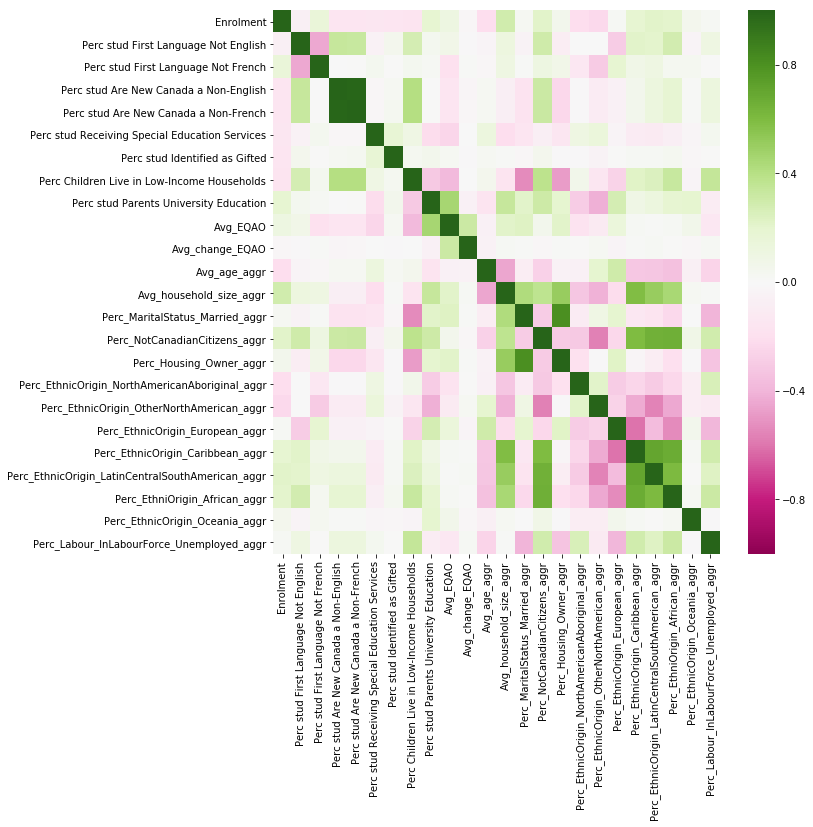

In [149]:
#Plotting a correlation matrix
correl = df_ml.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(correl, 
        xticklabels=correl.columns,
        yticklabels=correl.columns, vmin=-1, vmax=1,cmap="PiYG")

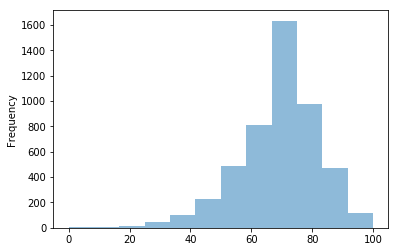

In [150]:
df_ml['Avg_EQAO'].plot.hist(bins=12, alpha=0.5)

In [167]:
#creating bins
bins = [0,60,80, 100]
labels=['Poor','Average','Excellent']
df_ml['EQAO_Class']= pd.cut(df_ml['Avg_EQAO'],bins,labels=labels)
labels_sort=labels.sort()
print(df_ml.EQAO_Class.value_counts())

df_ml.dropna(how='any',inplace=True)
# df_ml['weights'] = np.where(df_ml['EQAO_Class']=="Average",1,3)

df_ml.head()



Average      2932
Poor         1024
Excellent     930
Name: EQAO_Class, dtype: int64


,Board Name,Board Type,School Type,School Level,School Language,Grade Range,Enrolment,Perc stud First Language Not English,Perc stud First Language Not French,Perc stud Are New Canada a Non-English,Perc stud Are New Canada a Non-French,Perc stud Receiving Special Education Services,Perc stud Identified as Gifted,Perc Children Live in Low-Income Households,Perc stud Parents University Education,Avg_EQAO,Avg_change_EQAO,Avg_age_aggr,Avg_household_size_aggr,Perc_MaritalStatus_Married_aggr,Perc_NotCanadianCitizens_aggr,Perc_Housing_Owner_aggr,Perc_EthnicOrigin_NorthAmericanAboriginal_aggr,Perc_EthnicOrigin_OtherNorthAmerican_aggr,Perc_EthnicOrigin_European_aggr,Perc_EthnicOrigin_Caribbean_aggr,Perc_EthnicOrigin_LatinCentralSouthAmerican_aggr,Perc_EthniOrigin_African_aggr,Perc_EthnicOrigin_Oceania_aggr,Perc_Labour_InLabourForce_Unemployed_aggr,EQAO_Class
0,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Secondary,English,9-12,202.0,33.608842,100.0,8.734001,8.702096,19.800000,7.670225,22.7,20.5,68.867572,-0.457434,46.275,2.250,56.506849,1.929260,65.562914,7.219251,23.529412,68.181818,0.534759,0.000000,0.534759,0.0,5.514706,Average
1,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,182.0,33.608842,100.0,8.734001,8.702096,14.800000,7.670225,11.0,56.3,59.666667,-23.166667,46.725,2.325,60.204082,2.258065,81.944444,6.203474,25.558313,66.253102,0.496278,0.992556,0.496278,0.0,6.959707,Poor
2,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-3,64.0,33.608842,100.0,8.734001,8.702096,18.996518,7.670225,34.3,37.2,68.666667,22.000000,46.275,2.250,66.386555,2.347418,90.109890,4.022989,29.693487,66.283525,0.000000,0.000000,0.000000,0.0,3.380282,Average
3,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,177.0,33.608842,100.0,8.734001,8.702096,17.500000,7.670225,32.0,31.4,41.333333,-24.333333,44.500,2.325,62.776025,2.732240,86.250000,7.657658,20.720721,70.045045,0.900901,0.000000,0.675676,0.0,4.545455,Poor
4,Algoma DSB,Pub Dist Sch Brd (E/F),Public,Elementary,English,JK-8,152.0,33.608842,99.3,8.734001,8.702096,25.600000,7.670225,24.8,19.8,45.500000,-14.833333,46.900,2.050,56.231884,1.442308,64.676617,13.718412,31.768953,52.888087,1.624549,0.000000,0.000000,0.0,5.753425,Poor


In [168]:
#Start Model building
#Create Target and Predictors and split the data in test and training

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,precision_recall_curve,auc,average_precision_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

X = df_ml.drop(['EQAO_Class','Avg_EQAO'],axis=1)
y = df_ml['EQAO_Class']

In [169]:
# Models in scikitlearn can only handle numeric variables so use one-hot-encoding to create dummy variables

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)
X_ohe = enc.transform(X)

In [170]:
# Split the data into test and training with 15% reserved for testing

X_train,X_test,y_train,y_test = train_test_split(X_ohe,y, test_size = 0.30)

In [171]:
y_test.count()

1466

In [172]:
# Compute class weights to use in balancing the data
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
print(class_weights)

[0.55582643 1.74578867 1.59217877]


## Logistic Regression

In [173]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l2','l1']}]

grid_search = GridSearchCV(LogisticRegression(class_weight='balanced',max_iter=200), param_grid, cv= 4,
                      scoring='accuracy', n_jobs = -1)
grid_search.fit(X_train,y_train.tolist())
print ("best parameter: ", grid_search.best_params_)

best_model_log = grid_search.best_estimator_
print ("best_model: ", best_model_log)

best parameter:  {'penalty': 'l2'}
best_model:  LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [174]:
# Predicting the Test set results
y_pred_log = best_model_log.predict(X_test)
y_proba_log = best_model_log.predict_proba(X_test)

# Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix

acc_log = accuracy_score(y_test, y_pred_log)
print("The Accuracy score for Logistic Regression is: ", acc_log)

cm_log = confusion_matrix(y_test, y_pred_log)
print("The Confusion matrix for Logistic Regression is: \n" , cm_log)

The Accuracy score for Logistic Regression is:  0.621418826739427
The Confusion matrix for Logistic Regression is: 
 [[700  78 103]
 [163 100  14]
 [183  14 111]]


[[700  78 103]
 [163 100  14]
 [183  14 111]]


/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


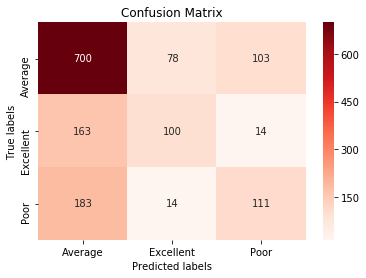

In [175]:
# Print a confusion matrix to check the output and model performance
labels = labels
cm = confusion_matrix(y_test, y_pred_log,labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

In [176]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log,
                            target_names=labels_sort))

              precision    recall  f1-score   support

     Average       0.67      0.79      0.73       881
   Excellent       0.52      0.36      0.43       277
        Poor       0.49      0.36      0.41       308

    accuracy                           0.62      1466
   macro avg       0.56      0.51      0.52      1466
weighted avg       0.60      0.62      0.60      1466



## XGBoost

In [177]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier


In [178]:
xgb_model = xgb.XGBClassifier()

cv_params = {'max_depth': [3,5], 'min_child_weight': [1,3,5],'learning_rate': [0.1,0.3,0.5],'gamma': [0.1,0.3]}

ind_params = {'n_estimators': 50, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'multi:softmax','num_class':3,'reg_lambda':0.1,'scale_pos_weight':1}

optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1)

In [180]:
optimized_GBM.fit(X_train, y_train.tolist())

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=50, n_jobs=1,
                                     nthread=None, num_class=3,
                                     objective='multi:softmax', random_state=0,
                                     reg_alpha=0, reg_lambda=0.1,
                                     scale_pos_weight=1, seed=0, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'gamma': [0.1, 0.3], 'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [

In [181]:
optimized_GBM.best_params_

{'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3}

In [182]:
y_pred_xgb = optimized_GBM.predict(X_test)

In [183]:
optimized_GBM.score(X_test, y_test)

0.626193724420191

[[832  30  19]
 [224  52   1]
 [271   3  34]]


/anaconda3/envs/PythonEnv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


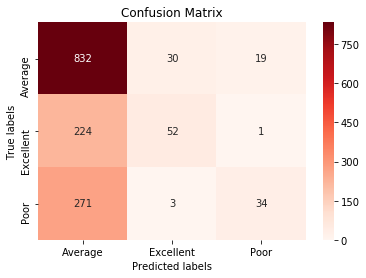

In [184]:
# Print a confusion matrix to check the output and model performance
labels = labels
cm = confusion_matrix(y_test, y_pred_xgb,labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='Reds'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

plt.show()

In [185]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb,
                            target_names=labels_sort))

              precision    recall  f1-score   support

     Average       0.63      0.94      0.75       881
   Excellent       0.61      0.19      0.29       277
        Poor       0.63      0.11      0.19       308

    accuracy                           0.63      1466
   macro avg       0.62      0.41      0.41      1466
weighted avg       0.62      0.63      0.55      1466

